In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
train_data=pd.read_csv('C:/Users/Laptop Zone/jupyterNoteBook/HousingPricePrediction/data/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [71]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [72]:
test_data=pd.read_csv('C:/Users/Laptop Zone/jupyterNoteBook/HousingPricePrediction/data/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [74]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [75]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

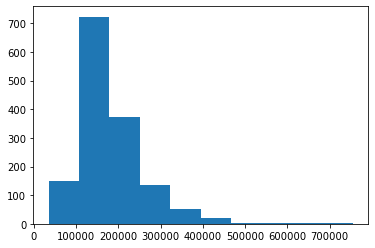

In [76]:
plt.hist(train_data['SalePrice'])
plt.show()

In [77]:
print ("Skew of SalePrice:", train_data['SalePrice'].skew())

Skew of SalePrice: 1.8828757597682129


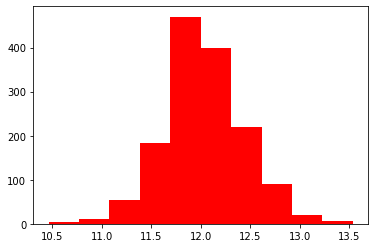

In [78]:
train_data['LT_SalePrice'] = np.log(train_data['SalePrice']+1)
plt.hist(train_data['LT_SalePrice'], color='red')
plt.show()

In [79]:
print ("Skew of Log Transformed SalePrice:", train_data['LT_SalePrice'].skew())

Skew of Log Transformed SalePrice: 0.12134661989685333


In [80]:
train_data.select_dtypes(include=[np.number]).columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'LT_SalePrice'], dtype=object)

In [81]:
zero_feat=[  'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold','LT_SalePrice']
out_feat=['SalePrice']

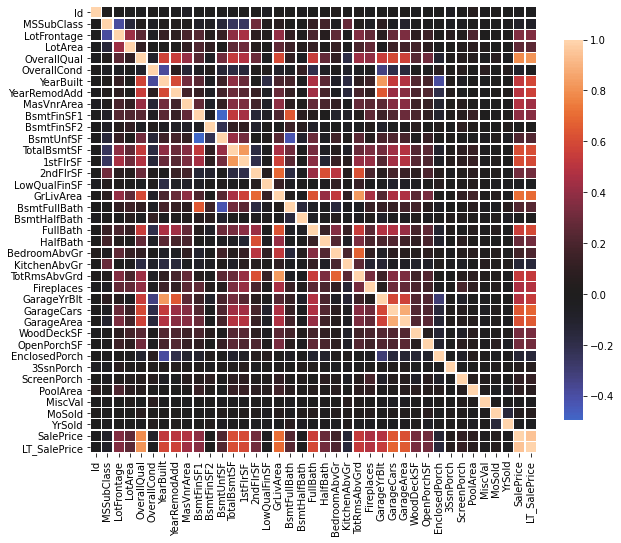

In [82]:
def correlation_heatmap(train_data):
    correlations = train_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train_data)

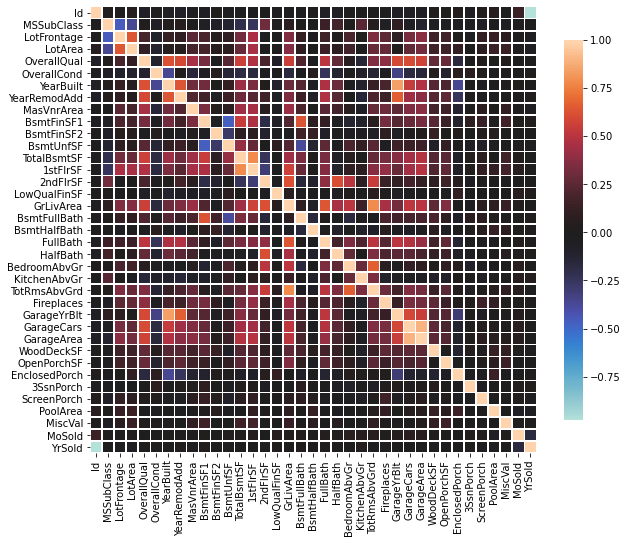

In [83]:
def correlation_heatmap(test_data):
    correlations = test_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test_data)

In [84]:
#Removing the null values
null_values = pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)[:10])
null_values.index.name = 'Feature'
null_values.columns = ['Number of Null Values']
null_values

,Number of Null Values
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageCond,81


In [85]:
nan_rows=train_data.iloc[np.where(train_data.isnull())]
print(nan_rows)

     Alley FireplaceQu PoolQC Fence MiscFeature Alley PoolQC Fence  \
0      NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
0      NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
0      NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
0      NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
0      NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
...    ...         ...    ...   ...         ...   ...    ...   ...   
1459   NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
1459   NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
1459   NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
1459   NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   
1459   NaN         NaN    NaN   NaN         NaN   NaN    NaN   NaN   

     MiscFeature Alley  ... Alley FireplaceQu PoolQC Fence MiscFeature Alley  \
0            NaN   NaN  ...   NaN         NaN    NaN   NaN         NaN   NaN   

In [86]:
nan2_rows=test_data.iloc[np.where(test_data.isnull())]
print(nan2_rows)

     Alley FireplaceQu PoolQC MiscFeature Alley FireplaceQu PoolQC  Fence  \
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
0      NaN         NaN    NaN         NaN   NaN         NaN    NaN  MnPrv   
1      NaN         NaN    NaN        Gar2   NaN         NaN    NaN    NaN   
...    ...         ...    ...         ...   ...         ...    ...    ...   
1457   NaN         NaN    NaN        Shed   NaN         NaN    NaN  MnPrv   
1458   NaN          TA    NaN         NaN   NaN          TA    NaN    NaN   
1458   NaN          TA    NaN         NaN   NaN          TA    NaN    NaN   
1458   NaN          TA    NaN         NaN   NaN          TA    NaN    NaN   
1458   NaN          TA    NaN         NaN   NaN          TA    NaN    NaN   

     Alley PoolQC  ... GarageType GarageYrBlt GarageFinish GarageQual  \
0 

In [87]:
train_data.select_dtypes(exclude=[np.number]).columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [88]:
cat_feat=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition']

In [89]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [90]:
data = train_data.select_dtypes(include=[np.number]).interpolate().dropna()

In [91]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(data)
y_noano = clf.predict(data)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

data = data.iloc[y_noano[y_noano['Top'] == 1].index.values]
data.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", data.shape[0])

Number of Outliers: 154
Number of rows without outliers: 1306


In [92]:
data.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LT_SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429220


In [93]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

col_train = list(data.columns)
col_train_bis = list(data.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(data)
#mat_test  = np.matrix(test_)
mat_new = np.matrix(data.drop('SalePrice',axis = 1))
mat_y = np.array(data.SalePrice).reshape((1306,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
#test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LT_SalePrice
0,0.000000,0.235294,0.150685,0.102935,0.666667,0.428571,0.955224,0.883333,0.12250,0.439601,...,0.116635,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.422014,0.701395
1,0.000685,0.000000,0.202055,0.119492,0.555556,0.857143,0.753731,0.433333,0.00000,0.608966,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.356378,0.646975
2,0.001371,0.235294,0.160959,0.143246,0.666667,0.428571,0.940299,0.866667,0.10125,0.302615,...,0.080306,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.458478,0.728656
3,0.002056,0.294118,0.133562,0.118772,0.666667,0.428571,0.298507,0.333333,0.00000,0.134496,...,0.066922,0.824242,0.0,0.0,0.0,0.0,0.090909,0.00,0.255493,0.545102
4,0.002742,0.235294,0.215753,0.186580,0.777778,0.428571,0.932836,0.833333,0.21875,0.407846,...,0.160612,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.522898,0.772625


In [94]:
# Linear Model for the  train and test
y = np.log(train_data.SalePrice)
X = train_data.drop(['SalePrice', 'Id'], axis=1)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [96]:
X_train=train_data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'LT_SalePrice']]
y_train=train_data['SalePrice']

In [97]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [98]:
X_test=test_data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [99]:
#handling null values

In [100]:
X_train=X_train.fillna(0)
nan_rows=X_train.iloc[np.where(X_train.isnull())]
print(nan_rows)

Empty DataFrame
Columns: []
Index: []


In [101]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LT_SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [102]:
X_test=X_test.fillna(0)
nan_rows=X_test.iloc[np.where(X_test.isnull())]
print(nan_rows)

Empty DataFrame
Columns: []
Index: []


In [103]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,Inside,...,120,0,0,MnPrv,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,Inside,...,144,0,0,0,0,0,1,2010,WD,Normal


In [104]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

In [105]:
train=pd.read_csv('C:/Users/Laptop Zone/jupyterNoteBook/HousingPricePrediction/data/train.csv')
test=pd.read_csv('C:/Users/Laptop Zone/jupyterNoteBook/HousingPricePrediction/data/test.csv')

In [106]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)

In [107]:
data = data[data.columns.difference(['Id'])]

In [108]:
ids = test["Id"]

In [109]:
data = data.fillna(0)

In [110]:
#Encoding categorical data
data = pd.get_dummies(data)

In [111]:
data.shape

(2919, 312)

In [112]:
data.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_0,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,1,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,1,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,1,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,1,0,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,1,0,1,0


In [113]:
train = data.iloc[:1460,:] #Upto 1460 rows from first
test = data.iloc[1460:,:] # From 1461th row to last
X_train = train[train.columns.difference(['SalePrice'])].values
y_train = train[['SalePrice']].values
X_test = test[test.columns.difference(['SalePrice'])].values

In [114]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, PowerTransformer
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [115]:
y_train.shape

(1460, 1)

In [116]:
flat_y = y_train.flatten()
flat_y.shape

(1460,)

In [117]:
from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, x=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [118]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, flat_y)
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=250)
# predict
lgbm_prediction_tr = gbm.predict(X_train, num_iteration=gbm.best_iteration)
lgbm_prediction_te = gbm.predict(X_test, num_iteration=gbm.best_iteration)


Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [119]:
train["lgb"] = lgbm_prediction_tr
test["lgb"] = lgbm_prediction_te

In [120]:
train.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_0,Utilities_AllPub,Utilities_NoSeWa,lgb
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,1,0,1,0,1,0,0.318032
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,1,0,1,0,1,0,0.008252


In [121]:
y_pred = sc_y.inverse_transform(lgbm_prediction_te)

In [122]:
y_pred

array([125112.61947507, 159941.60061715, 179800.79082196, ...,
       147411.31676378, 115851.43746952, 210385.08884737])

In [123]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)
data = data[data.columns.difference(['Id'])]
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]
X_train = train[train.columns.difference(['SalePrice'])].values
y_train = train[['SalePrice']].values
X_test = test[test.columns.difference(['SalePrice'])].values
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [124]:
#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =300, kernel_initializer='random_uniform', activation= 'tanh', 
                input_dim=X_train.shape[1]))
#Add the first hidden layer
model.add(Dense(units =300, kernel_initializer='random_uniform', activation= 'tanh'))
#Add the second hidden layer

model.add(Dense(units =10, kernel_initializer='random_uniform', activation= 'relu'))
#The output layer
model.add(Dense(units =1, kernel_initializer='random_uniform', activation= 'relu'))


In [125]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 300)               93900     
_________________________________________________________________
dense_33 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                3010      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 187,221
Trainable params: 187,221
Non-trainable params: 0
_________________________________________________________________
None


In [126]:

#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.07, batch_size=32, epochs=200, callbacks=[checkpoint])
model.load_weights(model_filepath)

Epoch 1/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0627 - mse: 0.6238
Epoch 00001: val_loss improved from inf to 0.02198, saving model to min_vl_model.h5
43/43 [==============================] - 1s 12ms/step - loss: 0.0620 - mse: 0.6339 - val_loss: 0.0220 - val_mse: 0.4246
Epoch 2/200
43/43 [==============================] - ETA: 0s - loss: 0.0255 - mse: 0.4947
Epoch 00002: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 6ms/step - loss: 0.0255 - mse: 0.4947 - val_loss: 0.0316 - val_mse: 0.4384
Epoch 3/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0187 - mse: 0.4453
Epoch 00003: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 6ms/step - loss: 0.0185 - mse: 0.4354 - val_loss: 0.0335 - val_mse: 0.4635
Epoch 4/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0164 - mse: 0.4062
Epoch 00004: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 6

32/43 [=====================>........] - ETA: 0s - loss: 0.0012 - mse: 0.2869   
Epoch 00063: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 6ms/step - loss: 0.0010 - mse: 0.2998 - val_loss: 0.1046 - val_mse: 1.4514
Epoch 64/200
40/43 [==========================>...] - ETA: 0s - loss: 8.6874e-04 - mse: 0.3014
Epoch 00064: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 6ms/step - loss: 8.4676e-04 - mse: 0.2995 - val_loss: 0.1060 - val_mse: 1.4897
Epoch 65/200
42/43 [============================>.] - ETA: 0s - loss: 8.1878e-04 - mse: 0.2996
Epoch 00065: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 5ms/step - loss: 8.1315e-04 - mse: 0.2984 - val_loss: 0.1073 - val_mse: 1.5260
Epoch 66/200
41/43 [===========================>..] - ETA: 0s - loss: 7.6682e-04 - mse: 0.3012
Epoch 00066: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 5ms/step - loss: 7.60

Epoch 94/200
42/43 [============================>.] - ETA: 0s - loss: 0.0016 - mse: 0.3011
Epoch 00094: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 7ms/step - loss: 0.0016 - mse: 0.3029 - val_loss: 0.0988 - val_mse: 1.2814
Epoch 95/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0015 - mse: 0.3005  
Epoch 00095: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.3013 - val_loss: 0.1006 - val_mse: 1.3334
Epoch 96/200
43/43 [==============================] - ETA: 0s - loss: 0.0014 - mse: 0.3003    
Epoch 00096: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.3003 - val_loss: 0.1035 - val_mse: 1.3980
Epoch 97/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0014 - mse: 0.3044  
Epoch 00097: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 7ms/step - loss: 0.0013

Epoch 125/200
35/43 [=======================>......] - ETA: 0s - loss: 3.3768e-04 - mse: 0.2905- ETA: 0s - loss: 2.4558e-04 - mse: 0.295
Epoch 00125: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 5ms/step - loss: 4.1229e-04 - mse: 0.2967 - val_loss: 0.0998 - val_mse: 1.3484
Epoch 126/200
38/43 [=========================>....] - ETA: 0s - loss: 5.9012e-04 - mse: 0.2973
Epoch 00126: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 5ms/step - loss: 5.9096e-04 - mse: 0.2974 - val_loss: 0.1004 - val_mse: 1.3510
Epoch 127/200
39/43 [==========================>...] - ETA: 0s - loss: 5.1221e-04 - mse: 0.3012
Epoch 00127: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 5ms/step - loss: 5.0776e-04 - mse: 0.2971 - val_loss: 0.1009 - val_mse: 1.3649
Epoch 128/200
36/43 [========================>.....] - ETA: 0s - loss: 6.3168e-04 - mse: 0.3127
Epoch 00128: val_loss did not improve from 0.02198
43

35/43 [=======================>......] - ETA: 0s - loss: 4.2443e-04 - mse: 0.2938
Epoch 00185: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 5ms/step - loss: 3.6975e-04 - mse: 0.2971 - val_loss: 0.1049 - val_mse: 1.4576
Epoch 186/200
38/43 [=========================>....] - ETA: 0s - loss: 3.4770e-04 - mse: 0.3051
Epoch 00186: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 7ms/step - loss: 3.3660e-04 - mse: 0.2966 - val_loss: 0.1047 - val_mse: 1.4520
Epoch 187/200
39/43 [==========================>...] - ETA: 0s - loss: 1.3874e-04 - mse: 0.2996
Epoch 00187: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 5ms/step - loss: 3.0025e-04 - mse: 0.2963 - val_loss: 0.1059 - val_mse: 1.4773
Epoch 188/200
38/43 [=========================>....] - ETA: 0s - loss: 2.8230e-04 - mse: 0.3003
Epoch 00188: val_loss did not improve from 0.02198
43/43 [==============================] - 0s 7ms/step - lo

In [127]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Activation 
from keras.layers import Dropout

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =300, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))

model.add(Dropout(0.2))

#Add the first hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'relu'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 300)               93900     
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_13 (Batc (None, 80)                320       
_________________________________________________________________
dropout_12 (Dropout)         (None, 80)               

In [128]:

#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model3.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.07, batch_size=32, epochs=200, callbacks=[checkpoint])
model.load_weights(model_filepath)

Epoch 1/200
40/43 [==========================>...] - ETA: 0s - loss: 0.1150 - mse: 0.8920
Epoch 00001: val_loss improved from inf to 0.03156, saving model to min_vl_model3.h5
43/43 [==============================] - 1s 18ms/step - loss: 0.1116 - mse: 0.8731 - val_loss: 0.0316 - val_mse: 0.4215
Epoch 2/200
42/43 [============================>.] - ETA: 0s - loss: 0.0541 - mse: 0.5656
Epoch 00002: val_loss improved from 0.03156 to 0.02698, saving model to min_vl_model3.h5
43/43 [==============================] - 1s 12ms/step - loss: 0.0545 - mse: 0.5686 - val_loss: 0.0270 - val_mse: 0.3930
Epoch 3/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0530 - mse: 0.5782
Epoch 00003: val_loss did not improve from 0.02698
43/43 [==============================] - 0s 7ms/step - loss: 0.0529 - mse: 0.5682 - val_loss: 0.0387 - val_mse: 0.4575
Epoch 4/200
43/43 [==============================] - ETA: 0s - loss: 0.0445 - mse: 0.5096
Epoch 00004: val_loss did not improve from 0.02698
43/43

Epoch 63/200
38/43 [=========================>....] - ETA: 0s - loss: 0.0061 - mse: 0.3406
Epoch 00063: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 7ms/step - loss: 0.0063 - mse: 0.3436 - val_loss: 0.0642 - val_mse: 0.7794
Epoch 64/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.3491
Epoch 00064: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 8ms/step - loss: 0.0067 - mse: 0.3462 - val_loss: 0.0593 - val_mse: 0.7291
Epoch 65/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0066 - mse: 0.3526
Epoch 00065: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/step - loss: 0.0065 - mse: 0.3486 - val_loss: 0.0605 - val_mse: 0.7444
Epoch 66/200
42/43 [============================>.] - ETA: 0s - loss: 0.0057 - mse: 0.3466
Epoch 00066: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 8ms/step - loss: 0.0056 - mse: 

Epoch 95/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.3356
Epoch 00095: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/step - loss: 0.0048 - mse: 0.3387 - val_loss: 0.0677 - val_mse: 0.7791
Epoch 96/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0046 - mse: 0.3328
Epoch 00096: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/step - loss: 0.0046 - mse: 0.3339 - val_loss: 0.0694 - val_mse: 0.8265
Epoch 97/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0043 - mse: 0.3327
Epoch 00097: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.3297 - val_loss: 0.0731 - val_mse: 0.8826
Epoch 98/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.3281
Epoch 00098: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 

40/43 [==========================>...] - ETA: 0s - loss: 0.0028 - mse: 0.3214
Epoch 00157: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/step - loss: 0.0028 - mse: 0.3215 - val_loss: 0.0873 - val_mse: 1.0841
Epoch 158/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0028 - mse: 0.3251
Epoch 00158: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/step - loss: 0.0029 - mse: 0.3191 - val_loss: 0.0780 - val_mse: 0.9322
Epoch 159/200
42/43 [============================>.] - ETA: 0s - loss: 0.0034 - mse: 0.3208
Epoch 00159: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.3203 - val_loss: 0.0794 - val_mse: 0.9273
Epoch 160/200
38/43 [=========================>....] - ETA: 0s - loss: 0.0031 - mse: 0.3240- ETA: 0s - loss: 0.0037 - mse: 0.3
Epoch 00160: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/st

Epoch 188/200
37/43 [========================>.....] - ETA: 0s - loss: 0.0029 - mse: 0.3186
Epoch 00188: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.3153 - val_loss: 0.0860 - val_mse: 1.0834
Epoch 189/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0026 - mse: 0.3148
Epoch 00189: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.3141 - val_loss: 0.0809 - val_mse: 0.9910
Epoch 190/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0030 - mse: 0.3184
Epoch 00190: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 6ms/step - loss: 0.0031 - mse: 0.3202 - val_loss: 0.0941 - val_mse: 1.2279
Epoch 191/200
37/43 [========================>.....] - ETA: 0s - loss: 0.0028 - mse: 0.3081
Epoch 00191: val_loss did not improve from 0.01619
43/43 [==============================] - 0s 7ms/step - loss: 0.0029 - m

In [129]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =150, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))



#Add the first hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'tanh'))


#Add the fourth hidden layer
model.add(Dense(units =30, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#Add the fifth hidden layer
model.add(Dense(units =10, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'relu'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 150)               46950     
_________________________________________________________________
dense_42 (Dense)             (None, 100)               15100     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_15 (Batc (None, 80)                320       
_________________________________________________________________
dropout_14 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 50)               

In [130]:
#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model4.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
history=model.fit(X_train,y_train, validation_split=0.07, batch_size=32, epochs=200, callbacks=[checkpoint])
model.load_weights(model_filepath)

Epoch 1/200
34/43 [======================>.......] - ETA: 0s - loss: 0.1075 - mse: 0.8046
Epoch 00001: val_loss improved from inf to 0.05953, saving model to min_vl_model4.h5
43/43 [==============================] - 1s 26ms/step - loss: 0.1030 - mse: 0.7749 - val_loss: 0.0595 - val_mse: 0.5864
Epoch 2/200
36/43 [========================>.....] - ETA: 0s - loss: 0.0570 - mse: 0.6127
Epoch 00002: val_loss improved from 0.05953 to 0.04509, saving model to min_vl_model4.h5
43/43 [==============================] - 0s 11ms/step - loss: 0.0570 - mse: 0.5912 - val_loss: 0.0451 - val_mse: 0.4634
Epoch 3/200
36/43 [========================>.....] - ETA: 0s - loss: 0.0468 - mse: 0.5530
Epoch 00003: val_loss improved from 0.04509 to 0.04270, saving model to min_vl_model4.h5
43/43 [==============================] - 0s 10ms/step - loss: 0.0449 - mse: 0.5411 - val_loss: 0.0427 - val_mse: 0.4794
Epoch 4/200
37/43 [========================>.....] - ETA: 0s - loss: 0.0344 - mse: 0.4754
Epoch 00004: val_

Epoch 32/200
36/43 [========================>.....] - ETA: 0s - loss: 0.0103 - mse: 0.3865
Epoch 00032: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 8ms/step - loss: 0.0104 - mse: 0.3798 - val_loss: 0.0468 - val_mse: 0.5380
Epoch 33/200
38/43 [=========================>....] - ETA: 0s - loss: 0.0107 - mse: 0.4040
Epoch 00033: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 7ms/step - loss: 0.0107 - mse: 0.3937 - val_loss: 0.0488 - val_mse: 0.5596
Epoch 34/200
38/43 [=========================>....] - ETA: 0s - loss: 0.0113 - mse: 0.3897
Epoch 00034: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 8ms/step - loss: 0.0110 - mse: 0.3868 - val_loss: 0.0543 - val_mse: 0.6242
Epoch 35/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0083 - mse: 0.3722
Epoch 00035: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 7ms/step - loss: 0.0084 - mse: 

43/43 [==============================] - ETA: 0s - loss: 0.0046 - mse: 0.3319
Epoch 00094: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 7ms/step - loss: 0.0046 - mse: 0.3319 - val_loss: 0.0773 - val_mse: 0.9134
Epoch 95/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0051 - mse: 0.3365
Epoch 00095: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 6ms/step - loss: 0.0050 - mse: 0.3366 - val_loss: 0.0710 - val_mse: 0.8474
Epoch 96/200
42/43 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.3326
Epoch 00096: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.3336 - val_loss: 0.0625 - val_mse: 0.7198
Epoch 97/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0038 - mse: 0.3337
Epoch 00097: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 6ms/step - loss: 0.0038 - mse: 0.3331 - val_

41/43 [===========================>..] - ETA: 0s - loss: 0.0028 - mse: 0.3195
Epoch 00156: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 8ms/step - loss: 0.0028 - mse: 0.3186 - val_loss: 0.0423 - val_mse: 0.5190
Epoch 157/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0027 - mse: 0.3264
Epoch 00157: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 8ms/step - loss: 0.0026 - mse: 0.3211 - val_loss: 0.0454 - val_mse: 0.5342
Epoch 158/200
37/43 [========================>.....] - ETA: 0s - loss: 0.0025 - mse: 0.3225
Epoch 00158: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 7ms/step - loss: 0.0026 - mse: 0.3214 - val_loss: 0.0611 - val_mse: 0.7279
Epoch 159/200
42/43 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.3300
Epoch 00159: val_loss did not improve from 0.02790
43/43 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.3321 - v

In [131]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =200, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))



#Add the first hidden layer
model.add(Dense(units =150, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'tanh'))


#Add the fourth hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#Add the fifth hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#Add the sixthth hidden layer
model.add(Dense(units =30, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'relu'))

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 200)               62600     
_________________________________________________________________
dense_49 (Dense)             (None, 150)               30150     
_________________________________________________________________
dropout_15 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 100)               15100     
_________________________________________________________________
batch_normalization_18 (Batc (None, 100)               400       
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 80)               

In [132]:
#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model5.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
history=model.fit(X_train,y_train, validation_split=0.07, batch_size=32, epochs=200, callbacks=[checkpoint])
model.load_weights(model_filepath)

Epoch 1/200
41/43 [===========================>..] - ETA: 0s - loss: 0.2270 - mse: 1.5248
Epoch 00001: val_loss improved from inf to 0.10962, saving model to min_vl_model5.h5
43/43 [==============================] - 1s 18ms/step - loss: 0.2233 - mse: 1.5090 - val_loss: 0.1096 - val_mse: 1.1143
Epoch 2/200
39/43 [==========================>...] - ETA: 0s - loss: 0.1284 - mse: 1.0404
Epoch 00002: val_loss did not improve from 0.10962
43/43 [==============================] - 0s 8ms/step - loss: 0.1294 - mse: 1.0241 - val_loss: 0.1340 - val_mse: 1.5720
Epoch 3/200
39/43 [==========================>...] - ETA: 0s - loss: 0.1057 - mse: 0.8134
Epoch 00003: val_loss did not improve from 0.10962
43/43 [==============================] - 0s 7ms/step - loss: 0.1052 - mse: 0.8121 - val_loss: 0.1683 - val_mse: 2.4631
Epoch 4/200
43/43 [==============================] - ETA: 0s - loss: 0.0803 - mse: 0.6796
Epoch 00004: val_loss improved from 0.10962 to 0.08615, saving model to min_vl_model5.h5
43/43 

Epoch 31/200
43/43 [==============================] - ETA: 0s - loss: 0.0204 - mse: 0.4188
Epoch 00031: val_loss did not improve from 0.01511
43/43 [==============================] - 0s 7ms/step - loss: 0.0204 - mse: 0.4188 - val_loss: 0.0205 - val_mse: 0.3716
Epoch 32/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0218 - mse: 0.4390
Epoch 00032: val_loss did not improve from 0.01511
43/43 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.4366 - val_loss: 0.0230 - val_mse: 0.3820
Epoch 33/200
38/43 [=========================>....] - ETA: 0s - loss: 0.0200 - mse: 0.4351
Epoch 00033: val_loss did not improve from 0.01511
43/43 [==============================] - 0s 8ms/step - loss: 0.0197 - mse: 0.4244 - val_loss: 0.0205 - val_mse: 0.3609
Epoch 34/200
42/43 [============================>.] - ETA: 0s - loss: 0.0199 - mse: 0.4178
Epoch 00034: val_loss did not improve from 0.01511
43/43 [==============================] - 0s 9ms/step - loss: 0.0198 - mse: 

Epoch 93/200
35/43 [=======================>......] - ETA: 0s - loss: 0.0089 - mse: 0.3791
Epoch 00093: val_loss did not improve from 0.01498
43/43 [==============================] - 0s 7ms/step - loss: 0.0088 - mse: 0.3651 - val_loss: 0.0176 - val_mse: 0.3542
Epoch 94/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0084 - mse: 0.3678
Epoch 00094: val_loss did not improve from 0.01498
43/43 [==============================] - 0s 8ms/step - loss: 0.0084 - mse: 0.3654 - val_loss: 0.0161 - val_mse: 0.3546
Epoch 95/200
41/43 [===========================>..] - ETA: 0s - loss: 0.0080 - mse: 0.3577- ETA: 0s - loss: 0.0074 - mse: 0.
Epoch 00095: val_loss did not improve from 0.01498
43/43 [==============================] - 0s 9ms/step - loss: 0.0079 - mse: 0.3594 - val_loss: 0.0249 - val_mse: 0.4042
Epoch 96/200
37/43 [========================>.....] - ETA: 0s - loss: 0.0074 - mse: 0.3524
Epoch 00096: val_loss did not improve from 0.01498
43/43 [==============================] - 

Epoch 124/200
38/43 [=========================>....] - ETA: 0s - loss: 0.0080 - mse: 0.3539
Epoch 00124: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 8ms/step - loss: 0.0085 - mse: 0.3622 - val_loss: 0.0344 - val_mse: 0.4609
Epoch 125/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0075 - mse: 0.3585
Epoch 00125: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 9ms/step - loss: 0.0075 - mse: 0.3600 - val_loss: 0.0329 - val_mse: 0.4545
Epoch 126/200
40/43 [==========================>...] - ETA: 0s - loss: 0.0069 - mse: 0.3434
Epoch 00126: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 8ms/step - loss: 0.0067 - mse: 0.3467 - val_loss: 0.0361 - val_mse: 0.4822
Epoch 127/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0067 - mse: 0.3455
Epoch 00127: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 9ms/step - loss: 0.0069 - m

40/43 [==========================>...] - ETA: 0s - loss: 0.0044 - mse: 0.3370
Epoch 00186: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.3326 - val_loss: 0.0220 - val_mse: 0.4015
Epoch 187/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0036 - mse: 0.3231
Epoch 00187: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.3256 - val_loss: 0.0222 - val_mse: 0.3979
Epoch 188/200
38/43 [=========================>....] - ETA: 0s - loss: 0.0041 - mse: 0.3302
Epoch 00188: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.3299 - val_loss: 0.0287 - val_mse: 0.4552
Epoch 189/200
37/43 [========================>.....] - ETA: 0s - loss: 0.0045 - mse: 0.3394
Epoch 00189: val_loss did not improve from 0.01339
43/43 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.3375 - v

In [133]:
#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =200, kernel_initializer='random_uniform', activation= 'tanh', 
                input_dim=X_train.shape[1]))
#Add the first hidden layer
model.add(Dense(units =50, kernel_initializer='random_uniform', activation= 'tanh'))

model.add(Dense(units =1, kernel_initializer='random_uniform', activation= 'relu'))

In [134]:
#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model1.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
history=model.fit(X_train,y_train, validation_split=0.07, batch_size=32, epochs=200, callbacks=[checkpoint])
model.load_weights(model_filepath)

Epoch 1/200
36/43 [========================>.....] - ETA: 0s - loss: 0.0543 - mse: 0.6016
Epoch 00001: val_loss improved from inf to 0.02556, saving model to min_vl_model1.h5
43/43 [==============================] - 0s 10ms/step - loss: 0.0516 - mse: 0.5862 - val_loss: 0.0256 - val_mse: 0.4250
Epoch 2/200
29/43 [===================>..........] - ETA: 0s - loss: 0.0244 - mse: 0.4801
Epoch 00002: val_loss improved from 0.02556 to 0.02233, saving model to min_vl_model1.h5
43/43 [==============================] - 0s 5ms/step - loss: 0.0242 - mse: 0.4817 - val_loss: 0.0223 - val_mse: 0.4204
Epoch 3/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0183 - mse: 0.4439
Epoch 00003: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 0.0179 - mse: 0.4451 - val_loss: 0.0305 - val_mse: 0.4446
Epoch 4/200
36/43 [========================>.....] - ETA: 0s - loss: 0.0141 - mse: 0.4128
Epoch 00004: val_loss did not improve from 0.02233
43/43 

Epoch 32/200
39/43 [==========================>...] - ETA: 0s - loss: 0.0016 - mse: 0.3162   
Epoch 00032: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.3141 - val_loss: 0.0457 - val_mse: 0.5398
Epoch 33/200
33/43 [======================>.......] - ETA: 0s - loss: 0.0018 - mse: 0.3178
Epoch 00033: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.3136 - val_loss: 0.0496 - val_mse: 0.5687
Epoch 34/200
42/43 [============================>.] - ETA: 0s - loss: 0.0016 - mse: 0.3136  
Epoch 00034: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 5ms/step - loss: 0.0016 - mse: 0.3131 - val_loss: 0.0463 - val_mse: 0.5432
Epoch 35/200
36/43 [========================>.....] - ETA: 0s - loss: 0.0016 - mse: 0.3108   
Epoch 00035: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 0.0015

Epoch 63/200
33/43 [======================>.......] - ETA: 0s - loss: 5.6777e-04 - mse: 0.3043
Epoch 00063: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 5.3845e-04 - mse: 0.3012 - val_loss: 0.0583 - val_mse: 0.7025
Epoch 64/200
35/43 [=======================>......] - ETA: 0s - loss: 5.4746e-04 - mse: 0.2935
Epoch 00064: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 5.1161e-04 - mse: 0.3009 - val_loss: 0.0582 - val_mse: 0.6958
Epoch 65/200
35/43 [=======================>......] - ETA: 0s - loss: 5.5940e-04 - mse: 0.3016
Epoch 00065: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 5.3345e-04 - mse: 0.3010 - val_loss: 0.0612 - val_mse: 0.7334
Epoch 66/200
34/43 [======================>.......] - ETA: 0s - loss: 6.5394e-04 - mse: 0.3145
Epoch 00066: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 6ms

Epoch 124/200
33/43 [======================>.......] - ETA: 0s - loss: 2.8827e-04 - mse: 0.3063
Epoch 00124: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 5.8163e-04 - mse: 0.2993 - val_loss: 0.0882 - val_mse: 1.1203
Epoch 125/200
33/43 [======================>.......] - ETA: 0s - loss: 2.4187e-04 - mse: 0.2944
Epoch 00125: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 5.7880e-04 - mse: 0.2993 - val_loss: 0.0897 - val_mse: 1.1393
Epoch 126/200
38/43 [=========================>....] - ETA: 0s - loss: 2.6713e-04 - mse: 0.3066
Epoch 00126: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 5ms/step - loss: 5.7954e-04 - mse: 0.2992 - val_loss: 0.0893 - val_mse: 1.1377
Epoch 127/200
33/43 [======================>.......] - ETA: 0s - loss: 3.4214e-04 - mse: 0.2961
Epoch 00127: val_loss did not improve from 0.02233
43/43 [==============================] - 0s

43/43 [==============================] - 0s 4ms/step - loss: 5.7414e-04 - mse: 0.2972 - val_loss: 0.0982 - val_mse: 1.3217
Epoch 185/200
33/43 [======================>.......] - ETA: 0s - loss: 7.0597e-04 - mse: 0.3071
Epoch 00185: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 6.0976e-04 - mse: 0.2974 - val_loss: 0.0975 - val_mse: 1.3089
Epoch 186/200
33/43 [======================>.......] - ETA: 0s - loss: 6.0194e-04 - mse: 0.2942
Epoch 00186: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 5.8291e-04 - mse: 0.2974 - val_loss: 0.0996 - val_mse: 1.3533
Epoch 187/200
34/43 [======================>.......] - ETA: 0s - loss: 6.1183e-04 - mse: 0.2939
Epoch 00187: val_loss did not improve from 0.02233
43/43 [==============================] - 0s 4ms/step - loss: 5.6845e-04 - mse: 0.2972 - val_loss: 0.0986 - val_mse: 1.3364
Epoch 188/200
37/43 [========================>.....] - ETA: 0s - lo

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = sc_y.inverse_transform(y_pred)
y_pred

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred["Id"] = ids
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission1.csv", index=False)